In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

2022-03-11 19:38:06.592974: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/przemek/projects/space_systems/ws_core/devel/lib:/home/przemek/projects/space_systems/ws_arm/devel/lib:/opt/ros/noetic/lib:/opt/ros/noetic/lib/x86_64-linux-gnu
2022-03-11 19:38:06.593052: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


**Read data**

In [2]:
temp_zuz = pd.read_csv('data/temp_zuz.csv', delimiter=';')
temp_zuz['Czas'] = pd.to_datetime(temp_zuz['Czas'])

In [3]:
df = pd.read_csv('data/data.csv')
df['czas'] = pd.to_datetime(df['czas'])

In [4]:
df.shape

(540492, 58)

In [5]:
temp_zuz.shape

(11384, 2)

In [6]:
df.head()

czas  001fcx00211.pv  001fcx00221.pv  001fcx00231.pv  \
0  2020-10-01 00:00:00+02:00       56.729077       54.724422       11.966905   
1  2020-10-01 00:01:00+02:00       54.771942       54.734675       12.026410   
2  2020-10-01 00:02:00+02:00       54.695816       54.774163       11.953671   
3  2020-10-01 00:03:00+02:00       54.154394       54.985713       12.052065   
4  2020-10-01 00:04:00+02:00       54.693184       54.490742       12.027310   

   001fcx00241.pv  001fir01307.daca.pv  001fir01308.daca.pv  \
0       22.493207           108.702362           112.280388   
1       22.593412           108.846612           112.334600   
2       22.428933           108.827640           112.362508   
3       22.335388           108.623473           112.386061   
4       22.412620           108.746784           112.396792   

   001fir01309.daca.pv  001fir01310.daca.pv  001fir01311.daca.pv  ...  \
0           110.013796           108.761583           110.604901  ...   
1           109.906645           108.879083           110.644046  ...   
2           109.970932           108.844765           110.621665  ...   
3           109.836948           108.717994           110.464245  ...   
4           109.966910           108.978605           110.603660  ...   

   001uxm0rf01.daca.pv  001uxm0rf02.daca.pv  001uxm0rf03.daca.pv  \
0            92.090454            92.024078            92.405281   
1            92.090534            92.024206            92.405239   
2            92.090613            92.024334            92.405196   
3            92.090692            92.024462            92.405153   
4            92.090771            92.024590            92.405110   

   037tix00254.daca.pv  037tix00264.daca.pv  prazonka_fe  prazonka_s  \
0            24.665309            24.526161         4.48        8.98   
1            24.663982            24.526161         4.48        8.98   
2            24.662656            24.526161         4.48        8.98   
3            24.661329            24.526161         4.48        8.98   
4            24.660003            24.525475         4.48        8.98   

   prob_corg  prob_fe  prob_s  
0        8.6     4.55    9.87  
1        8.6     4.55    9.87  
2        8.6     4.55    9.87  
3        8.6     4.55    9.87  
4        8.6     4.55    9.87  

[5 rows x 58 columns]

In [7]:
temp_zuz.head()

Czas  temp_zuz
0 2020-10-01 00:00:00      1297
1 2020-10-01 01:00:00      1295
2 2020-10-01 02:00:00      1303
3 2020-10-01 02:30:00      1302
4 2020-10-01 03:00:00      1303

**Simple feature engineering**

In [8]:
# średnia woda powrotna kolektora
TIR = df.columns[df.columns.str.contains('tir')].values
df["avg_woda_powrotna"] = df[TIR].mean(axis=1)
df = df.drop(TIR, axis=1)
df.head()

czas  001fcx00211.pv  001fcx00221.pv  001fcx00231.pv  \
0  2020-10-01 00:00:00+02:00       56.729077       54.724422       11.966905   
1  2020-10-01 00:01:00+02:00       54.771942       54.734675       12.026410   
2  2020-10-01 00:02:00+02:00       54.695816       54.774163       11.953671   
3  2020-10-01 00:03:00+02:00       54.154394       54.985713       12.052065   
4  2020-10-01 00:04:00+02:00       54.693184       54.490742       12.027310   

   001fcx00241.pv  001fir01307.daca.pv  001fir01308.daca.pv  \
0       22.493207           108.702362           112.280388   
1       22.593412           108.846612           112.334600   
2       22.428933           108.827640           112.362508   
3       22.335388           108.623473           112.386061   
4       22.412620           108.746784           112.396792   

   001fir01309.daca.pv  001fir01310.daca.pv  001fir01311.daca.pv  ...  \
0           110.013796           108.761583           110.604901  ...   
1           109.906645           108.879083           110.644046  ...   
2           109.970932           108.844765           110.621665  ...   
3           109.836948           108.717994           110.464245  ...   
4           109.966910           108.978605           110.603660  ...   

   001uxm0rf02.daca.pv  001uxm0rf03.daca.pv  037tix00254.daca.pv  \
0            92.024078            92.405281            24.665309   
1            92.024206            92.405239            24.663982   
2            92.024334            92.405196            24.662656   
3            92.024462            92.405153            24.661329   
4            92.024590            92.405110            24.660003   

   037tix00264.daca.pv  prazonka_fe  prazonka_s  prob_corg  prob_fe  prob_s  \
0            24.526161         4.48        8.98        8.6     4.55    9.87   
1            24.526161         4.48        8.98        8.6     4.55    9.87   
2            24.526161         4.48        8.98        8.6     4.55    9.87   
3            24.526161         4.48        8.98        8.6     4.55    9.87   
4            24.525475         4.48        8.98        8.6     4.55    9.87   

   avg_woda_powrotna  
0          29.086390  
1          29.087996  
2          29.094825  
3          29.098936  
4          29.096812  

[5 rows x 51 columns]

In [9]:
# średnia woda chłodząca kolektora
FIR = df.columns[df.columns.str.contains('fir')].values
df["avg_woda_chlodzaca"] = df[FIR].mean(axis=1)
df = df.drop(FIR, axis=1)
df.head()

czas  001fcx00211.pv  001fcx00221.pv  001fcx00231.pv  \
0  2020-10-01 00:00:00+02:00       56.729077       54.724422       11.966905   
1  2020-10-01 00:01:00+02:00       54.771942       54.734675       12.026410   
2  2020-10-01 00:02:00+02:00       54.695816       54.774163       11.953671   
3  2020-10-01 00:03:00+02:00       54.154394       54.985713       12.052065   
4  2020-10-01 00:04:00+02:00       54.693184       54.490742       12.027310   

   001fcx00241.pv  001nir0szr0.daca.pv  001tix01063.daca.pv  \
0       22.493207            14.362428           385.911908   
1       22.593412            14.381825           385.917027   
2       22.428933            14.359413           385.922148   
3       22.335388            14.353036           385.927267   
4       22.412620            14.392053           385.932387   

   001tix01064.daca.pv  001tix01065.daca.pv  001tix01066.daca.pv  ...  \
0           421.166412           455.862854           435.741310  ...   
1           421.166412           455.862427           435.739176  ...   
2           421.166412           455.862000           435.737043  ...   
3           421.166412           455.861572           435.734911  ...   
4           421.166412           455.861145           435.732775  ...   

   001uxm0rf03.daca.pv  037tix00254.daca.pv  037tix00264.daca.pv  prazonka_fe  \
0            92.405281            24.665309            24.526161         4.48   
1            92.405239            24.663982            24.526161         4.48   
2            92.405196            24.662656            24.526161         4.48   
3            92.405153            24.661329            24.526161         4.48   
4            92.405110            24.660003            24.525475         4.48   

   prazonka_s  prob_corg  prob_fe  prob_s  avg_woda_powrotna  \
0        8.98        8.6     4.55    9.87          29.086390   
1        8.98        8.6     4.55    9.87          29.087996   
2        8.98        8.6     4.55    9.87          29.094825   
3        8.98        8.6     4.55    9.87          29.098936   
4        8.98        8.6     4.55    9.87          29.096812   

   avg_woda_chlodzaca  
0          113.360791  
1          113.354389  
2          113.383070  
3          113.281268  
4          113.380821  

[5 rows x 44 columns]

In [10]:
# średnia temperatura pod warstwą wymurówki
TIX = df.columns[df.columns.str.contains('tix')].values
df["avg_temp_pod"] = df[TIX].mean(axis=1)
df = df.drop(TIX, axis=1)
df.head()

czas  001fcx00211.pv  001fcx00221.pv  001fcx00231.pv  \
0  2020-10-01 00:00:00+02:00       56.729077       54.724422       11.966905   
1  2020-10-01 00:01:00+02:00       54.771942       54.734675       12.026410   
2  2020-10-01 00:02:00+02:00       54.695816       54.774163       11.953671   
3  2020-10-01 00:03:00+02:00       54.154394       54.985713       12.052065   
4  2020-10-01 00:04:00+02:00       54.693184       54.490742       12.027310   

   001fcx00241.pv  001nir0szr0.daca.pv  001txi01153.daca.pv  \
0       22.493207            14.362428            19.126427   
1       22.593412            14.381825            19.125526   
2       22.428933            14.359413            19.124626   
3       22.335388            14.353036            19.123726   
4       22.412620            14.392053            19.122826   

   001txi01154.daca.pv  001uxm0rf01.daca.pv  001uxm0rf02.daca.pv  \
0            19.929581            92.090454            92.024078   
1            19.942439            92.090534            92.024206   
2            19.919802            92.090613            92.024334   
3            19.861671            92.090692            92.024462   
4            19.803541            92.090771            92.024590   

   001uxm0rf03.daca.pv  prazonka_fe  prazonka_s  prob_corg  prob_fe  prob_s  \
0            92.405281         4.48        8.98        8.6     4.55    9.87   
1            92.405239         4.48        8.98        8.6     4.55    9.87   
2            92.405196         4.48        8.98        8.6     4.55    9.87   
3            92.405153         4.48        8.98        8.6     4.55    9.87   
4            92.405110         4.48        8.98        8.6     4.55    9.87   

   avg_woda_powrotna  avg_woda_chlodzaca  avg_temp_pod  
0          29.086390          113.360791    388.652871  
1          29.087996          113.354389    388.651983  
2          29.094825          113.383070    388.651095  
3          29.098936          113.281268    388.650208  
4          29.096812          113.380821    388.649294

In [11]:
df.shape

(540492, 19)

**Shuffle data and split**

In [12]:
new_df = pd.concat([df, temp_zuz], axis=1)
new_df = new_df.drop(["czas"], axis=1)
new_df = new_df.dropna(axis=0)
new_df = new_df.sample(frac=1)

In [13]:
new_df

001fcx00211.pv  001fcx00221.pv  001fcx00231.pv  001fcx00241.pv  \
1016        54.738784       55.047446       11.131562       20.968990   
11261       59.279535       60.299877       10.953540       33.016031   
6162        57.535304       57.637976        9.950541       28.426233   
1015        54.555257       54.644107       11.008709       21.090984   
9389        60.483330       59.782480       12.040129       28.136015   
...               ...             ...             ...             ...   
5927        58.528937       57.687484        9.956892       25.382689   
1954        54.942940       55.007179       15.135908       24.020194   
441         54.137634       54.760218       13.076887       23.822261   
10360       58.869699       58.879260       11.011962       26.929686   
345         54.364750       55.118903       13.084759       22.936363   

       001nir0szr0.daca.pv  001txi01153.daca.pv  001txi01154.daca.pv  \
1016             14.148993            19.886414            20.204168   
11261            17.312169            20.022250            20.254604   
6162             15.846283            14.756908            15.202167   
1015             14.148199            19.896863            20.203913   
9389             17.429407            22.416243            22.548940   
...                    ...                  ...                  ...   
5927             18.299062            16.377521            16.818745   
1954             13.671491            17.144389            17.670392   
441              14.546041            17.155818            17.740670   
10360            19.726814            17.770010            17.733137   
345              13.752193            17.572300            18.083419   

       001uxm0rf01.daca.pv  001uxm0rf02.daca.pv  001uxm0rf03.daca.pv  \
1016             92.095638            92.061554            92.410149   
11261            92.150190            92.061554            92.408159   
6162             92.091682            92.071793            92.402707   
1015             92.091896            92.061554            92.410192   
9389             92.110966            92.039273            92.383629   
...                    ...                  ...                  ...   
5927             92.096727            92.048613            92.400361   
1954             92.087256            92.076332            92.399182   
441              92.133443            92.054397            92.400276   
10360            92.124175            92.071793            92.404980   
345              92.095851            92.067357            92.401329   

       prazonka_fe  prazonka_s  prob_corg  prob_fe  prob_s  avg_woda_powrotna  \
1016          4.19        8.40       8.68     4.58    9.61          29.420633   
11261         4.46        8.30       8.96     4.46    9.74          29.023490   
6162          4.48        8.98       8.74     4.56   10.09          28.718606   
1015          4.19        8.40       8.68     4.58    9.61          29.425245   
9389          4.39        8.08       8.67     4.50   10.04          28.730653   
...            ...         ...        ...      ...     ...                ...   
5927          4.34        7.71       8.82     4.59    9.97          28.646385   
1954          4.32        8.45       9.00     4.75    9.70          28.983720   
441           4.23        7.96       8.73     4.54    9.67          29.002595   
10360         4.46        9.20       9.25     4.49    9.84          28.426473   
345           4.30        7.84       8.61     4.58    9.74          28.870764   

       avg_woda_chlodzaca  avg_temp_pod                Czas  temp_zuz  
1016           113.290643    388.923353 2020-11-13 11:00:00    1292.0  
11261          113.599509    390.195416 2022-01-27 02:00:00    1294.0  
6162           113.426000    389.284412 2021-06-21 20:30:00    1309.0  
1015           113.257053    388.923030 2020-11-13 10:00:00    1298.0  
9389           113.544112    389.956773 2021-11-06 19:00:00    1311

In [14]:
new_df.shape

(11384, 20)

In [35]:
feature_desc_df = pd.read_csv('feature_desc.csv', index_col='name')
def feature_desc(name):
        try:
            if type(name)==str:
                return feature_desc_df.loc[name]['desc']
            else:
                return feature_desc_df.loc[name]['desc'].values
        except:
            return name

In [39]:
col_names = list(new_df.columns.values)

for col_name in col_names:
    new_df = new_df.rename(columns={col_name: feature_desc(col_name)})


<AxesSubplot:>

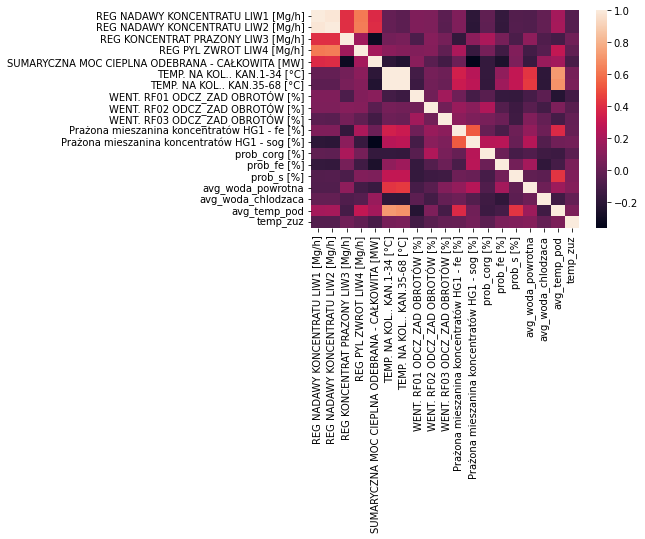

In [40]:
import seaborn as sns

# calculate the correlation matrix
corr = new_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [15]:
train = new_df.iloc[:int(new_df.shape[0] * 0.9)]
test = new_df.iloc[int(new_df.shape[0] * 0.9):]

In [16]:
train_X = train.drop(["temp_zuz"], axis=1)
test_X = test.drop(["temp_zuz"], axis=1)
train_Y = np.array(train["temp_zuz"])
test_Y = np.array(test["temp_zuz"])

In [17]:
test_Y

array([1300., 1305., 1306., ..., 1309., 1291., 1308.])

**Normalization**

In [18]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_X))

2022-03-11 19:38:56.298363: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 19:38:56.298702: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/przemek/projects/space_systems/ws_core/devel/lib:/home/przemek/projects/space_systems/ws_arm/devel/lib:/opt/ros/noetic/lib:/opt/ros/noetic/lib/x86_64-linux-gnu
2022-03-11 19:38:56.298784: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/przemek/projects/space_systems/ws_core/devel/lib:/home/przemek/projects/space_systems/ws_arm/devel/lib:/opt/ros/noet

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).